In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import datasets

In [2]:
n = 7

In [3]:
inputs = keras.Input( shape = ( 32, 32, 3 ), name = 'input' )

identity = layers.Conv2D( filters = 16, kernel_size = [ 7, 7 ], padding = 'Same', activation = 'relu' )(inputs)
identity = layers.BatchNormalization()(identity)
identity = layers.Activation('relu')(identity)

identity = layers.MaxPooling2D( pool_size = [ 3, 3 ], strides = 2, padding = 'same' )(identity)
identity = layers.ZeroPadding2D( padding = [ 8, 8 ] )(identity)

# block 1
for i in range( n ):
    if i == 0:
        output = layers.Conv2D( filters = 16, kernel_size = [ 3, 3 ], padding = 'Same' )(identity)
        output = layers.BatchNormalization()(output)
        output = layers.Activation('relu')(output)
        
        output = layers.Conv2D( filters = 16, kernel_size = [ 3, 3 ], padding = 'Same' )(output)
        output = layers.BatchNormalization()(output)
        
        identity = layers.BatchNormalization()( identity )

        output = layers.Add()( [ output, identity ] )
        identity = layers.Activation('relu')(output)
    else:
        output = layers.Conv2D( filters = 16, kernel_size = [ 3, 3 ], padding = 'Same' )(identity)
        output = layers.BatchNormalization()(output)
        output = layers.Activation('relu')(output)
        
        output = layers.Conv2D( filters = 16, kernel_size = [ 3, 3 ], padding = 'Same' )(output)
        output = layers.BatchNormalization()(output)
        
        output = layers.Add()( [ output, identity ] )
        identity = layers.Activation('relu')(output)

In [4]:
# block 2
for i in range( n ):
    if i == 0:
        output = layers.Conv2D( filters = 32, kernel_size = [ 3, 3 ], padding = 'valid', strides = [ 2, 2 ] )(identity)
        output = layers.BatchNormalization()(output)
        output = layers.Activation('relu')(output)
        
        output = layers.Conv2D( filters = 32, kernel_size = [ 3, 3 ], padding = 'Same' )(output)
        output = layers.BatchNormalization()(output)
        
        identity = layers.Conv2D( filters = 32, kernel_size = [ 3, 3 ], padding = 'valid', strides = [ 2, 2 ] )(identity)
        identity = layers.BatchNormalization()(identity)

        output = layers.Add()( [ output, identity ] )
        identity = layers.Activation('relu')(output)       
    else:
        output = layers.Conv2D( filters = 32, kernel_size = [ 3, 3 ], padding = 'Same' )(identity)
        output = layers.BatchNormalization()(output)
        output = layers.Activation('relu')(output)
        
        output = layers.Conv2D( filters = 32, kernel_size = [ 3, 3 ], padding = 'Same' )(output)
        output = layers.BatchNormalization()(output)
        
        output = layers.Add()( [ output, identity ] )
        identity = layers.Activation('relu')(output)

In [5]:
# block 3
for i in range( n ):
    if i == 0:        
        output = layers.Conv2D( filters = 64, kernel_size = [ 3, 3 ], padding = 'valid', strides = [ 2, 2 ] )(identity)
        output = layers.BatchNormalization()(output)
        output = layers.Activation('relu')(output)
        
        output = layers.Conv2D( filters = 64, kernel_size = [ 3, 3 ], padding = 'Same' )(output)
        output = layers.BatchNormalization()(output)

        identity = layers.Conv2D( filters = 64, kernel_size = [ 3, 3 ], padding = 'valid', strides = [ 2, 2 ] )(identity)
        identity = layers.BatchNormalization()(identity)

        output = layers.Add()( [ output, identity ] )
        identity = layers.Activation('relu')(output)        
    else:
        output = layers.Conv2D( filters = 64, kernel_size = [ 3, 3 ], padding = 'Same' )(identity)
        output = layers.BatchNormalization()(output)
        output = layers.Activation('relu')(output)
        
        output = layers.Conv2D( filters = 64, kernel_size = [ 3, 3 ], padding = 'Same' )(output)
        output = layers.BatchNormalization()(output)
        
        output = layers.Add()( [ output, identity ] )
        identity = layers.Activation('relu')(output)

In [6]:
output = layers.GlobalAveragePooling2D()(identity)
output = layers.Dense( 128, activation = 'relu' )(output)
output = layers.Dense( 128, activation = 'relu' )(output)
output = layers.Dense( 10, activation = 'softmax' )(output)

In [7]:
model = keras.Model( inputs = inputs, outputs = output, name = 'resnet' )
model.summary()

Model: "resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 16)   2368        input[0][0]                      
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 16)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 16)   0           batch_normalization[0][0]        
_____________________________________________________________________________________________

In [8]:
lr = 1e-3
BATCH_SIZE = 512
EPOCHS = 50
model_name = 'ResNet_46layes(50epochs)'

In [9]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = keras.utils.to_categorical( y_train, 10 )
y_test = keras.utils.to_categorical( y_test, 10 )

model.compile( optimizer = keras.optimizers.RMSprop( lr, 0.9 ), loss = keras.losses.CategoricalCrossentropy( from_logits = True ), metrics = [ 'acc' ] )

170500096/170498071 [==============================] - 6s 0us/step


In [10]:
history = model.fit( x_train, y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split = 0.2 )

Epoch 1/50
79/79 [==============================] - 20s 249ms/step - loss: 2.1732 - acc: 0.2729 - val_loss: 2.3359 - val_acc: 0.1192
Epoch 2/50
79/79 [==============================] - 19s 239ms/step - loss: 2.0740 - acc: 0.3789 - val_loss: 2.3181 - val_acc: 0.1396
Epoch 3/50
79/79 [==============================] - 19s 238ms/step - loss: 2.0393 - acc: 0.4151 - val_loss: 2.2901 - val_acc: 0.1536
Epoch 4/50
79/79 [==============================] - 19s 235ms/step - loss: 2.0170 - acc: 0.4381 - val_loss: 2.3449 - val_acc: 0.1122
Epoch 5/50
79/79 [==============================] - 18s 234ms/step - loss: 1.9955 - acc: 0.4598 - val_loss: 2.3036 - val_acc: 0.1516
Epoch 6/50
79/79 [==============================] - 19s 235ms/step - loss: 1.9805 - acc: 0.4744 - val_loss: 2.2755 - val_acc: 0.1837
Epoch 7/50
79/79 [==============================] - 19s 236ms/step - loss: 1.9606 - acc: 0.4960 - val_loss: 2.1475 - val_acc: 0.3084
Epoch 8/50
79/79 [==============================] - 19s 236ms/step - 

In [11]:
evaluation = model.evaluate( x_test, y_test )
print( f'loss: {evaluation[0]:.2f}, acc: {evaluation[1]*100:.2f}%' )

313/313 [==============================] - 2s 6ms/step - loss: 1.9817 - acc: 0.4777
loss: 1.98, acc: 47.77%


In [12]:
model.save( model_name + '.h5' )

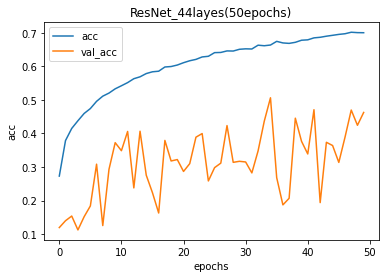

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot( history.history['acc'] )
plt.plot( history.history['val_acc'])
plt.xlabel( 'epochs' )
plt.ylabel( 'acc' )
plt.legend( ['acc', 'val_acc'] )
plt.title( model_name )

plt.savefig(model_name + '.png')
plt.show()